In [103]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams['figure.figsize'] = [20, 20]

In [104]:
data = './11-3_AllDataEDIT.csv'
df = pd.read_csv(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ResponseId      139 non-null    object 
 1   Q1              128 non-null    object 
 2   Q2              118 non-null    object 
 3   Q2_20_TEXT      21 non-null     object 
 4   Q2_28_TEXT      1 non-null      object 
 5   Q2_36_TEXT      6 non-null      object 
 6   Q2_45_TEXT      7 non-null      object 
 7   Q2_51_TEXT      0 non-null      float64
 8   Q2_53_TEXT      1 non-null      object 
 9   MAJOR_CATEGORY  118 non-null    object 
 10  Q3              116 non-null    object 
 11  Q3_11_TEXT      7 non-null      object 
 12  Q4              111 non-null    object 
 13  Q4_6_TEXT       5 non-null      object 
 14  Q5              116 non-null    object 
 15  Q5_8_TEXT       8 non-null      object 
 16  Q6              112 non-null    object 
 17  Q7              52 non-null     obj

In [105]:
df.set_index('ResponseId', inplace=True)
df.head()

,Q1,Q2,Q2_20_TEXT,Q2_28_TEXT,Q2_36_TEXT,Q2_45_TEXT,Q2_51_TEXT,Q2_53_TEXT,MAJOR_CATEGORY,Q3,...,Q9_7_TEXT,Q10,Q10_6_TEXT,Q11,Q11_9_TEXT,Q12,Q12_5_TEXT,Q13,Q13_9_TEXT,Q14
ResponseId,,,,,,,,,,,,,,,,,,,,,
R_1ghf8xJrVXbbkuJ,"Master's student,PhD student","Arts, Media & Design",NaN,NaN,NaN,NaN,NaN,NaN,AandH,Youtube Videos,...,NaN,"Text message (iMessage, SMS/MMS, etc),Email",NaN,Notes you created,NaN,Small student-made class group chats,NaN,Figma Community,NaN,Strongly disagree
R_1mJIzOkTM39eIoR,Undergraduate student,Language & Literature,NaN,NaN,NaN,NaN,NaN,NaN,AandH,Canva,...,NaN,NaN,NaN,NaN,NaN,Student clubs and organizations,NaN,"Instagram,Slack",NaN,NaN
R_A6ySdYTmAuABsE9,Undergraduate student,Other STEM subjects (please specify),Cognitive Science,NaN,NaN,NaN,NaN,NaN,STEM,"Canva,Notion",...,NaN,"Text message (iMessage, SMS/MMS, etc),Communic...",NaN,Notes you created,NaN,"Small student-made class group chats,Large stu...",NaN,"Slack,Discord",NaN,Somewhat disagree
R_414qzLh0YJf4L2p,Undergraduate student,"Computer Science,Psychology,Sociology,Language...",NaN,NaN,NaN,NaN,NaN,NaN,STEM,"Canva,Anki,Chegg,Course Hero,Quizlet,Notion,Yo...",...,NaN,NaN,NaN,NaN,NaN,"Small student-made class group chats,Large stu...",NaN,"Slack,Discord,Other (please specify)",iMessage,NaN
R_wUmCGtAmACqmP29,Undergraduate student,"Space & Astronomy,Anthropology,Language & Lite...",NaN,NaN,NaN,NaN,NaN,NaN,STEM,"Course Hero,Khan Academy,Youtube Videos",...,NaN,NaN,NaN,NaN,NaN,"Instructor-assigned groups,Online forums",NaN,I don't share resources online,NaN,NaN


### Q0: Major group proportions

In [113]:
nSTEM = 0
nHandM = 0
nSS = 0
nAandH = 0
nBandF = 0

for rID in df.index:
    response = df.loc[rID]
    major = response["MAJOR_CATEGORY"]
    
    if major == "STEM": nSTEM += 1
    if major == "HandM": nHandM += 1
    if major == "SS": nSS += 1
    if major == "AandH": nAandH += 1
    if major == "BandF": nBandF += 1

total = nSTEM + nHandM + nSS + nAandH + nBandF

print("Stem %: " + str(100*(nSTEM/total)))
print("HandM %: " + str(100*(nHandM/total)))
print("SS %: " + str(100*(nSS/total)))
print("AandH %: " + str(100*(nAandH/total)))
print("BandF %: " + str(100*(nBandF/total)))
        

Stem %: 59.32203389830508
HandM %: 5.932203389830509
SS %: 8.47457627118644
AandH %: 20.33898305084746
BandF %: 5.932203389830509


### Q1: How do major grouping and study group vary?

same:41 diff:98 total:139


<AxesSubplot:>

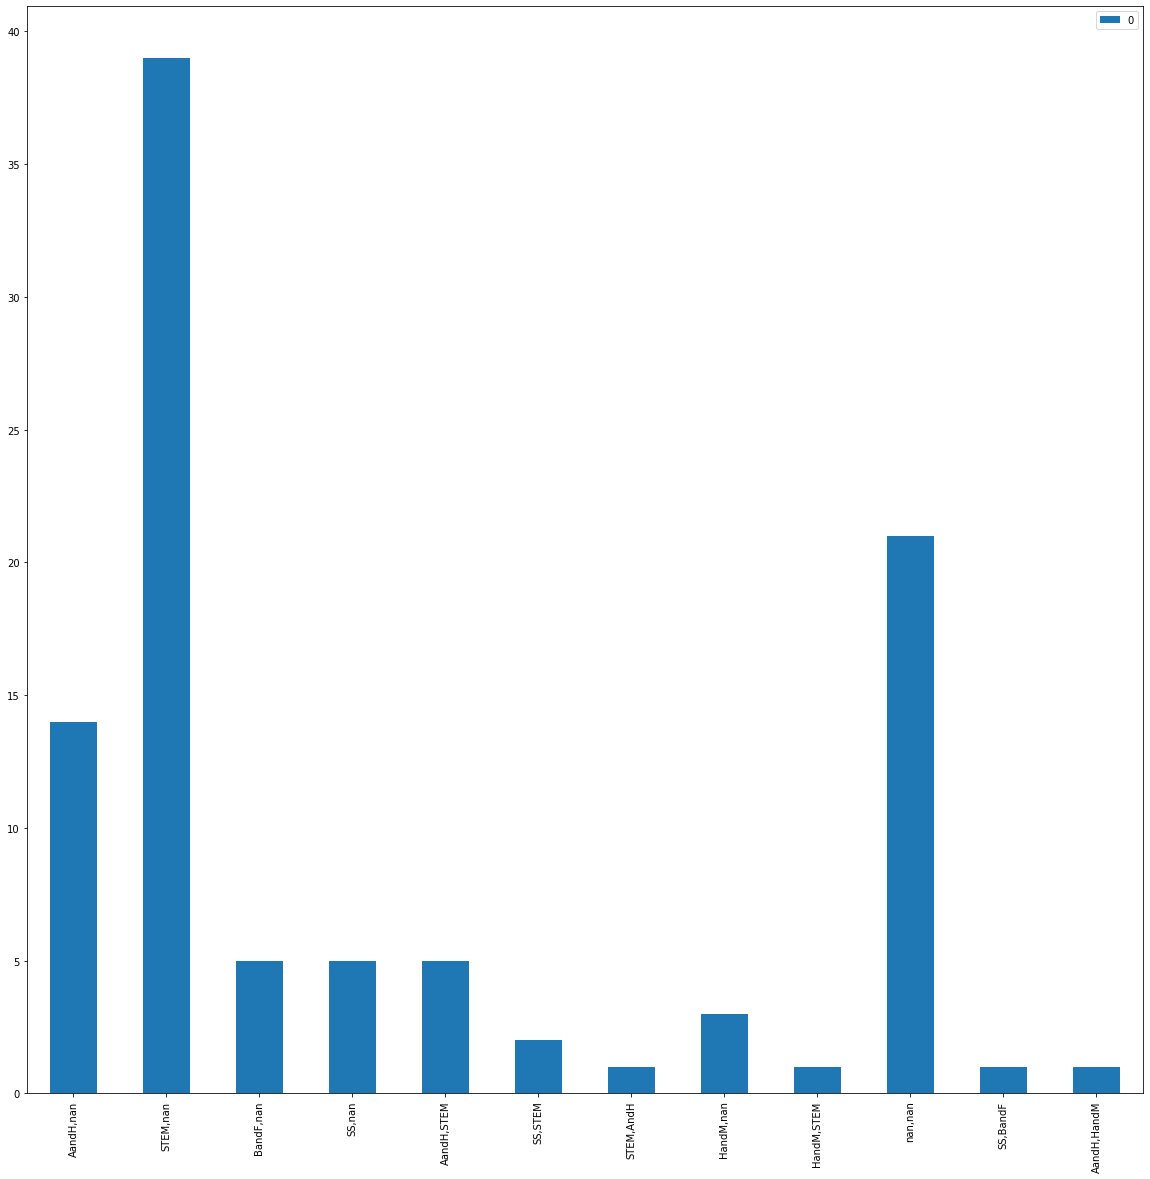

In [106]:
# Are major group and study group the same?
same = 0
diff = 0
diffs = []
sames = []

for rID in df.index:
    response = df.loc[rID]
    if response['MAJOR_CATEGORY'] != response['STUDY_CATEGORY']:
        diff += 1
        comb = str(response['MAJOR_CATEGORY']) + "," + str(response['STUDY_CATEGORY'])
        diffs.append(comb)

    else:
        same += 1   
        comb = str(response['MAJOR_CATEGORY']) + "," + str(response['STUDY_CATEGORY'])
        sames.append(comb)


print('same:' + str(same) + " diff:" + str(diff) + " total:" + str(same + diff))

count = Counter(diffs)
temp_df = pd.DataFrame.from_dict(count, orient='index')
temp_df.plot(kind='bar')


<AxesSubplot:>

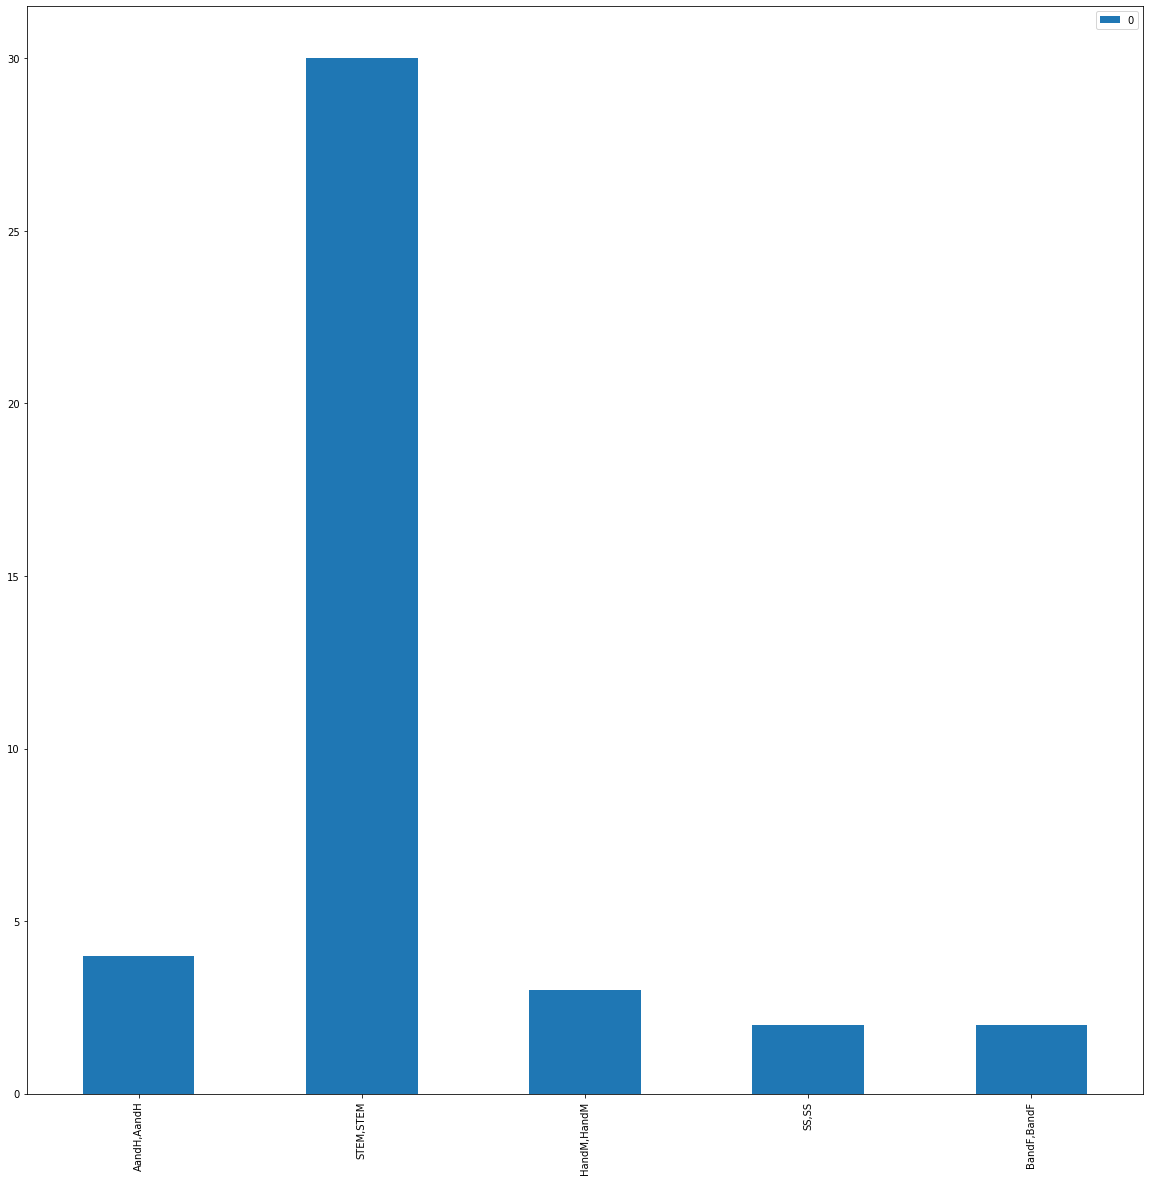

In [107]:
count = Counter(sames)
temp_df = pd.DataFrame.from_dict(count, orient='index')
temp_df.plot(kind='bar')

### Q2: How does major group affect study tools/resources (Qs 3, 4, 5)

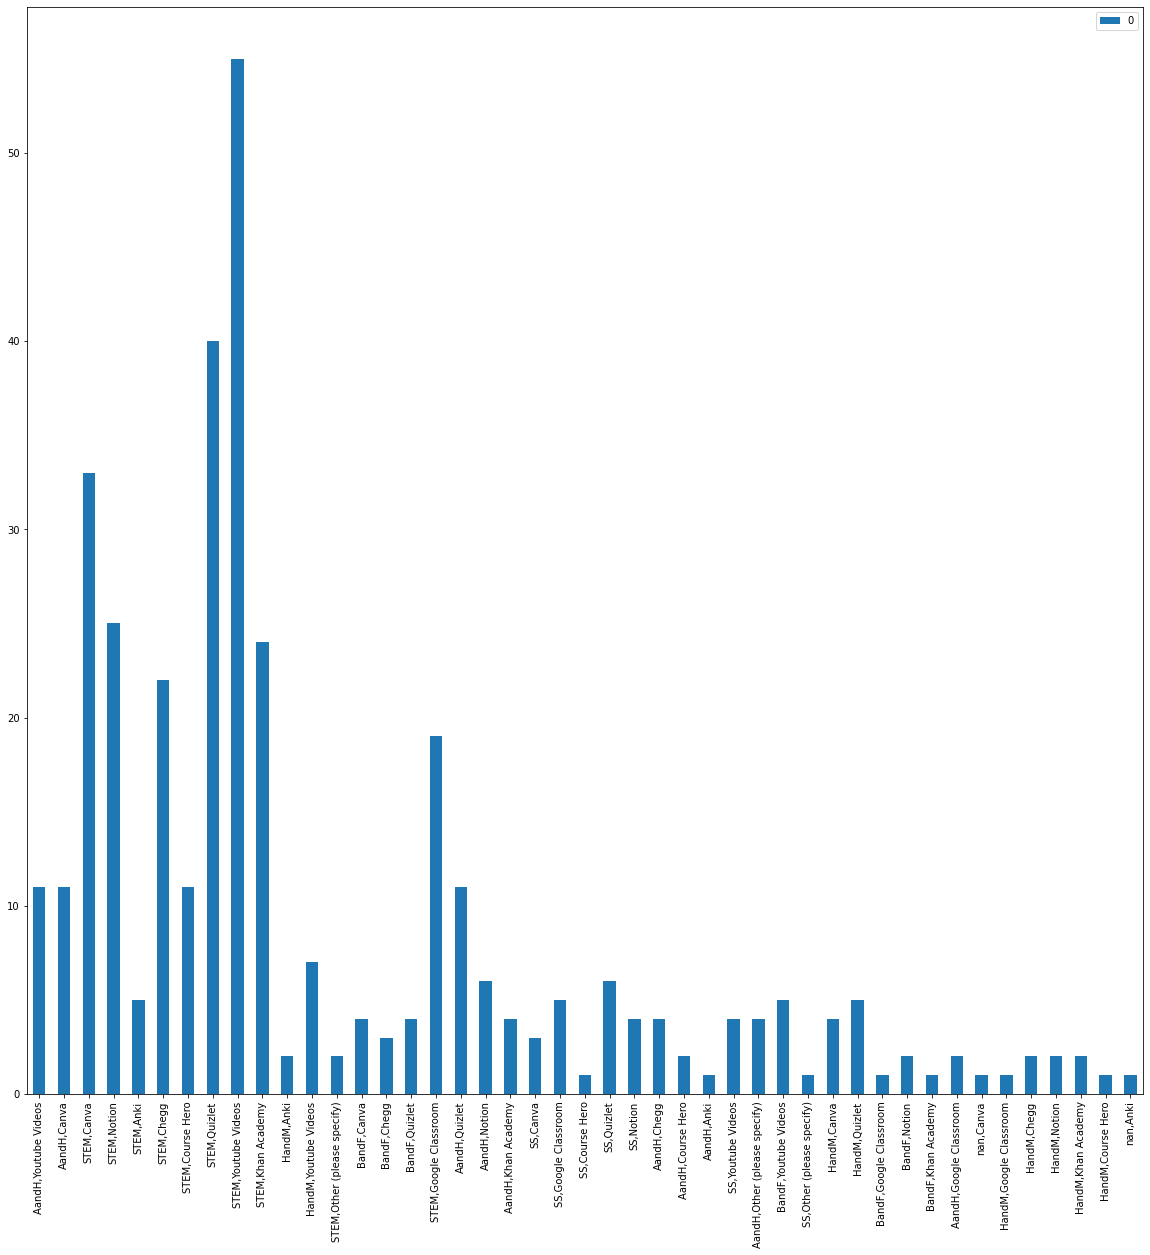

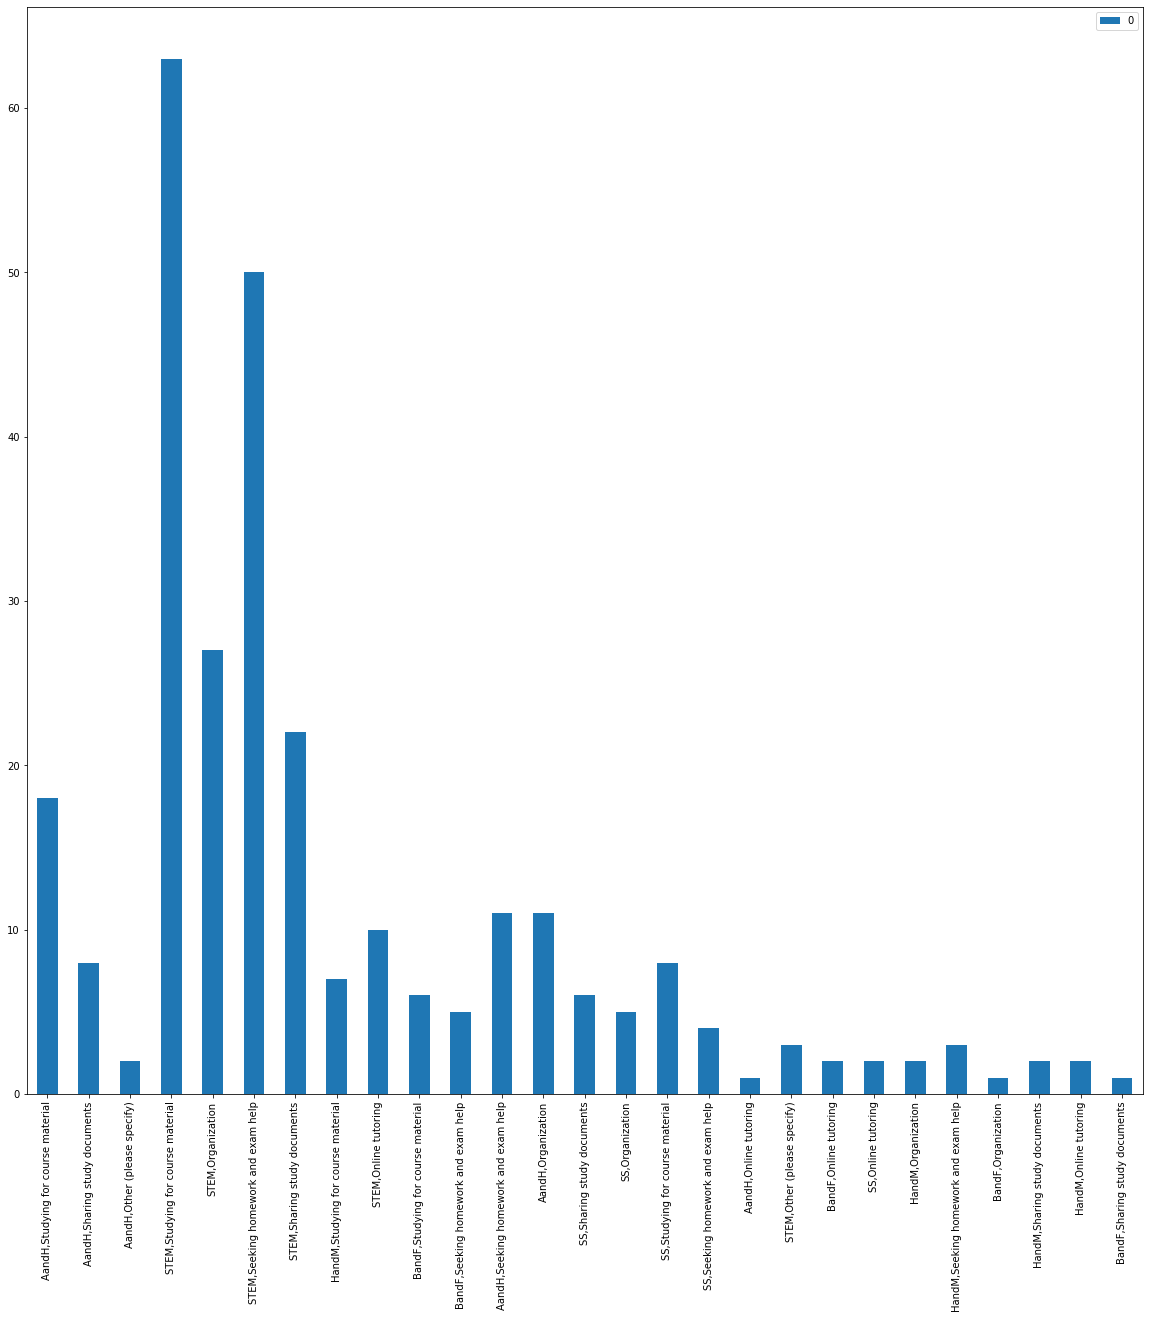

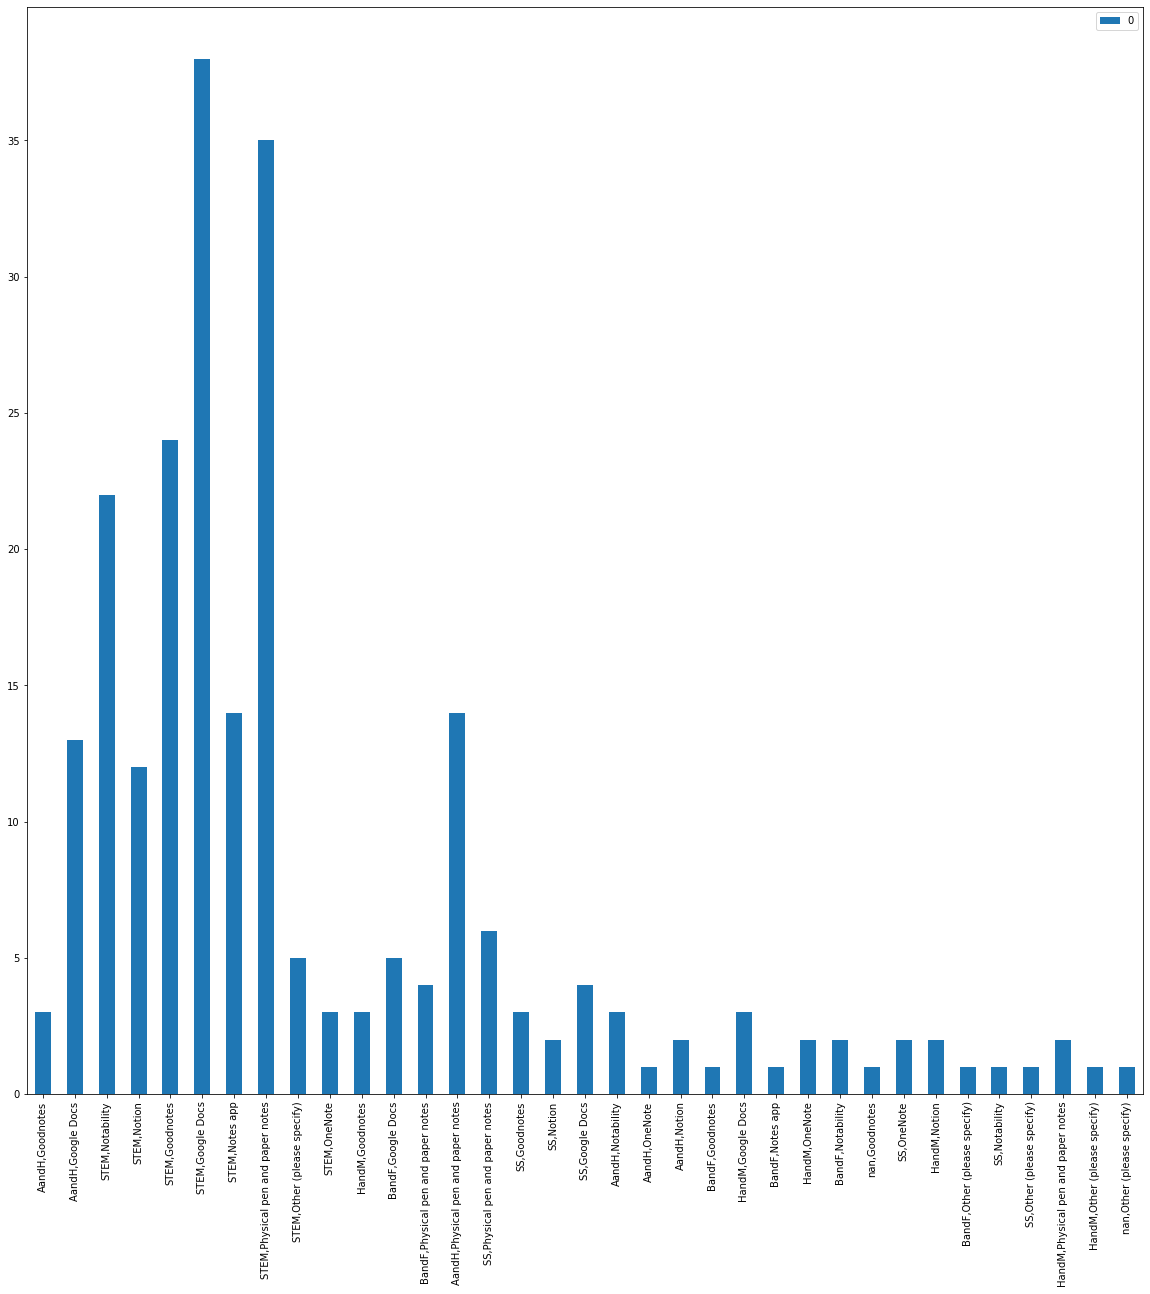

In [109]:
combs_Q3 = []
combs_Q4 = []
combs_Q5 = []

for rID in df.index:
    response = df.loc[rID]
    major_group = response['MAJOR_CATEGORY']
    
    if pd.notna(response['Q3']):
        for tool in response['Q3'].split(','):
            comb = str(major_group) + "," + str(tool)
            combs_Q3.append(comb)
    if pd.notna(response['Q4']):
        for tool in response['Q4'].split(','):
            comb = str(major_group) + "," + str(tool)
            combs_Q4.append(comb)
    if pd.notna(response['Q5']):
        for tool in response['Q5'].split(','):
            comb = str(major_group) + "," + str(tool)
            combs_Q5.append(comb)
    
Qs = [combs_Q3, combs_Q4, combs_Q5]
for q in Qs:
    count = Counter(q)
    temp_df = pd.DataFrame.from_dict(count, orient='index')
    temp_df.plot(kind='bar')


### Q3: How are respondants sharing their notes? (Qs 8, 9)

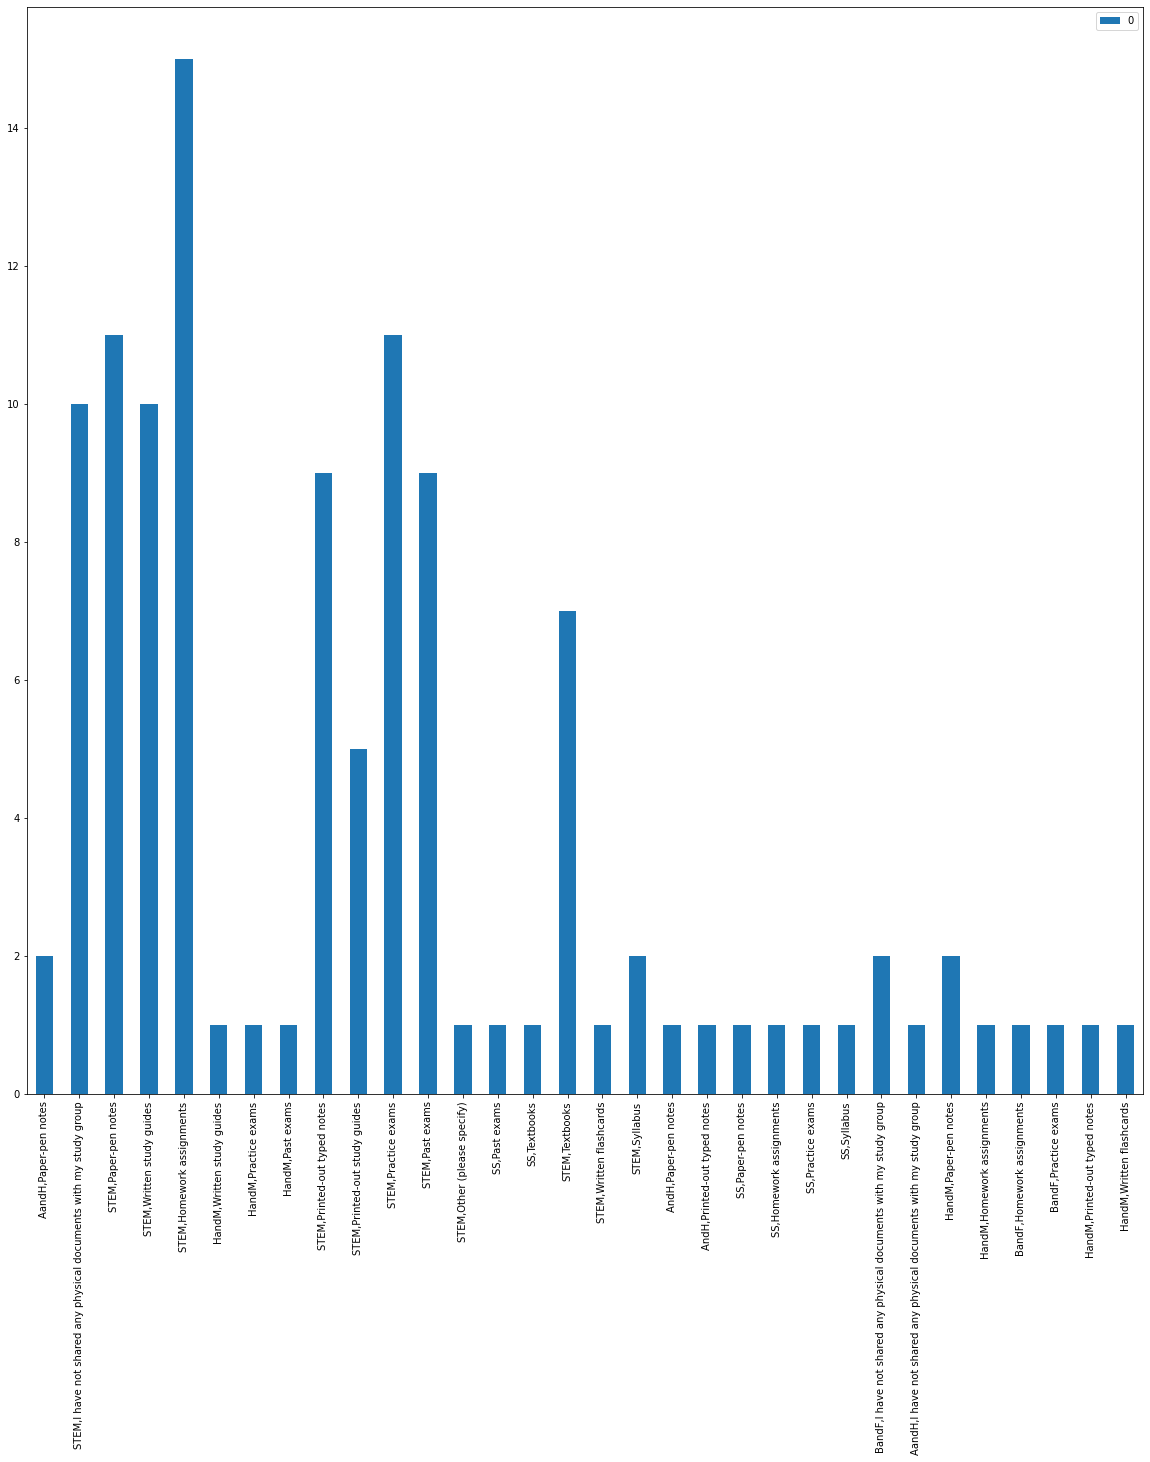

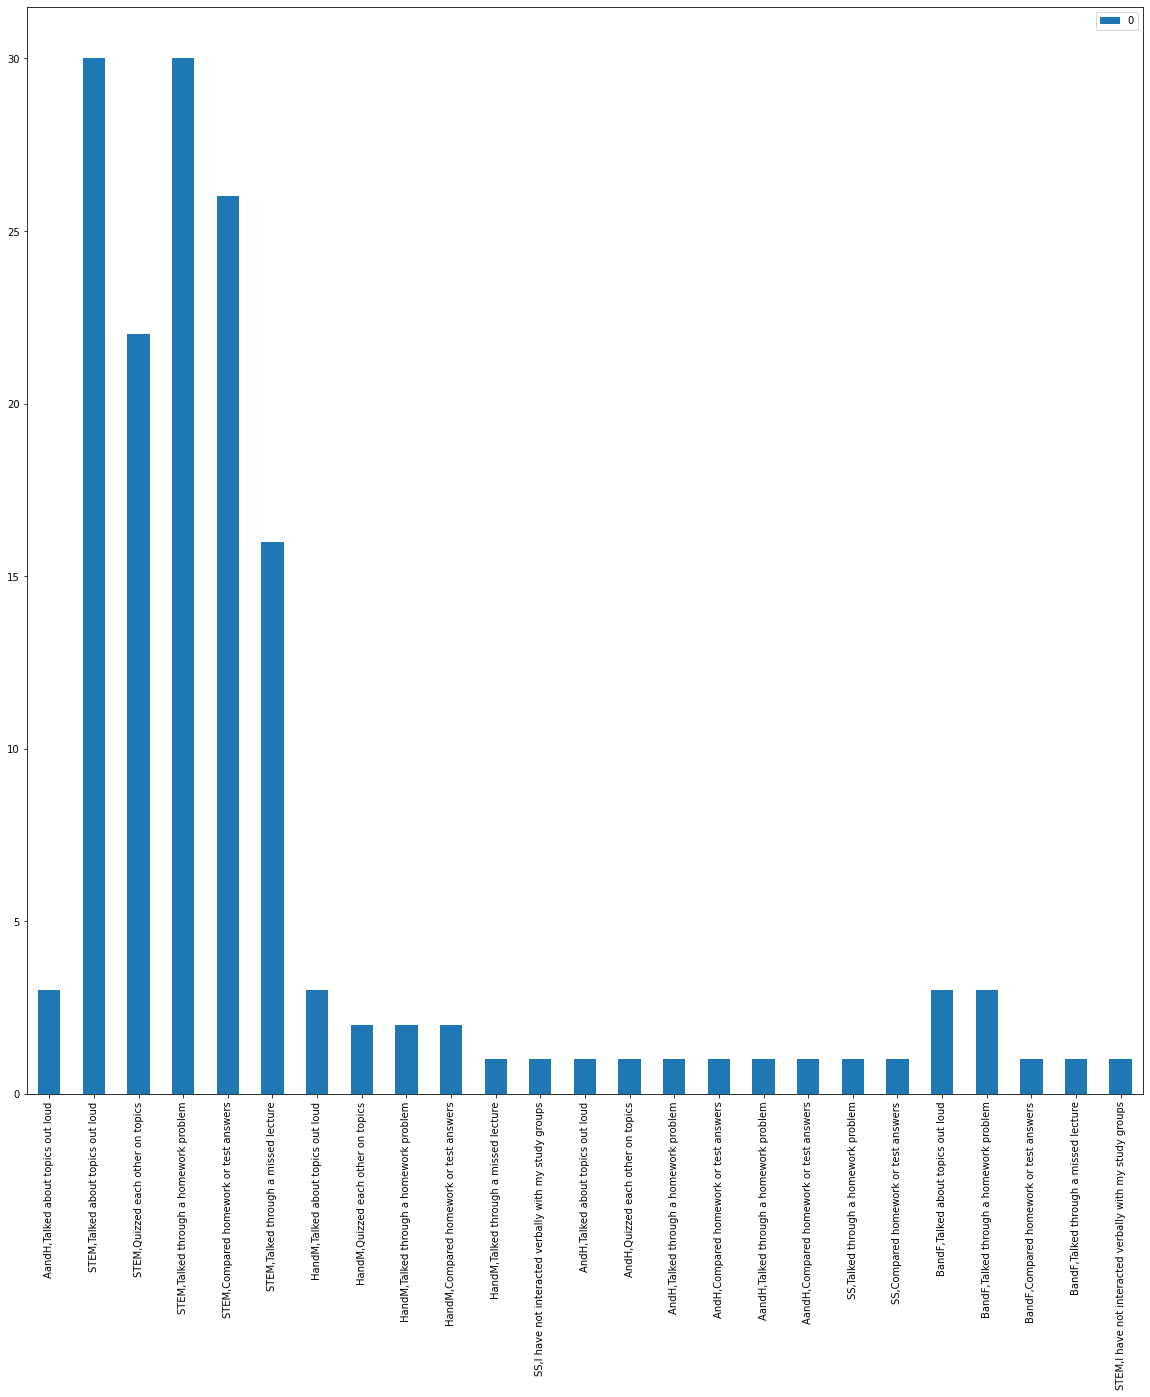

In [111]:
combs_Q8 = []
combs_Q9 = []

for rID in df.index:
    response = df.loc[rID]
    major_group = response['MAJOR_CATEGORY']
    study_group = response['STUDY_CATEGORY']
    
    if pd.notna(response['Q8']):
        for tool in response['Q8'].split(','):
            comb = str(study_group) + "," + str(tool)
            combs_Q8.append(comb)
    if pd.notna(response['Q9']):
        for tool in response['Q9'].split(','):
            comb = str(study_group) + "," + str(tool)
            combs_Q9.append(comb)

Qs = [combs_Q8, combs_Q9]
for q in Qs:
    count = Counter(q)
    temp_df = pd.DataFrame.from_dict(count, orient='index')
    temp_df.plot(kind='bar')

### Q4: How, What, and Where are respondants sharing notes? (Qs 10, 11, 13)

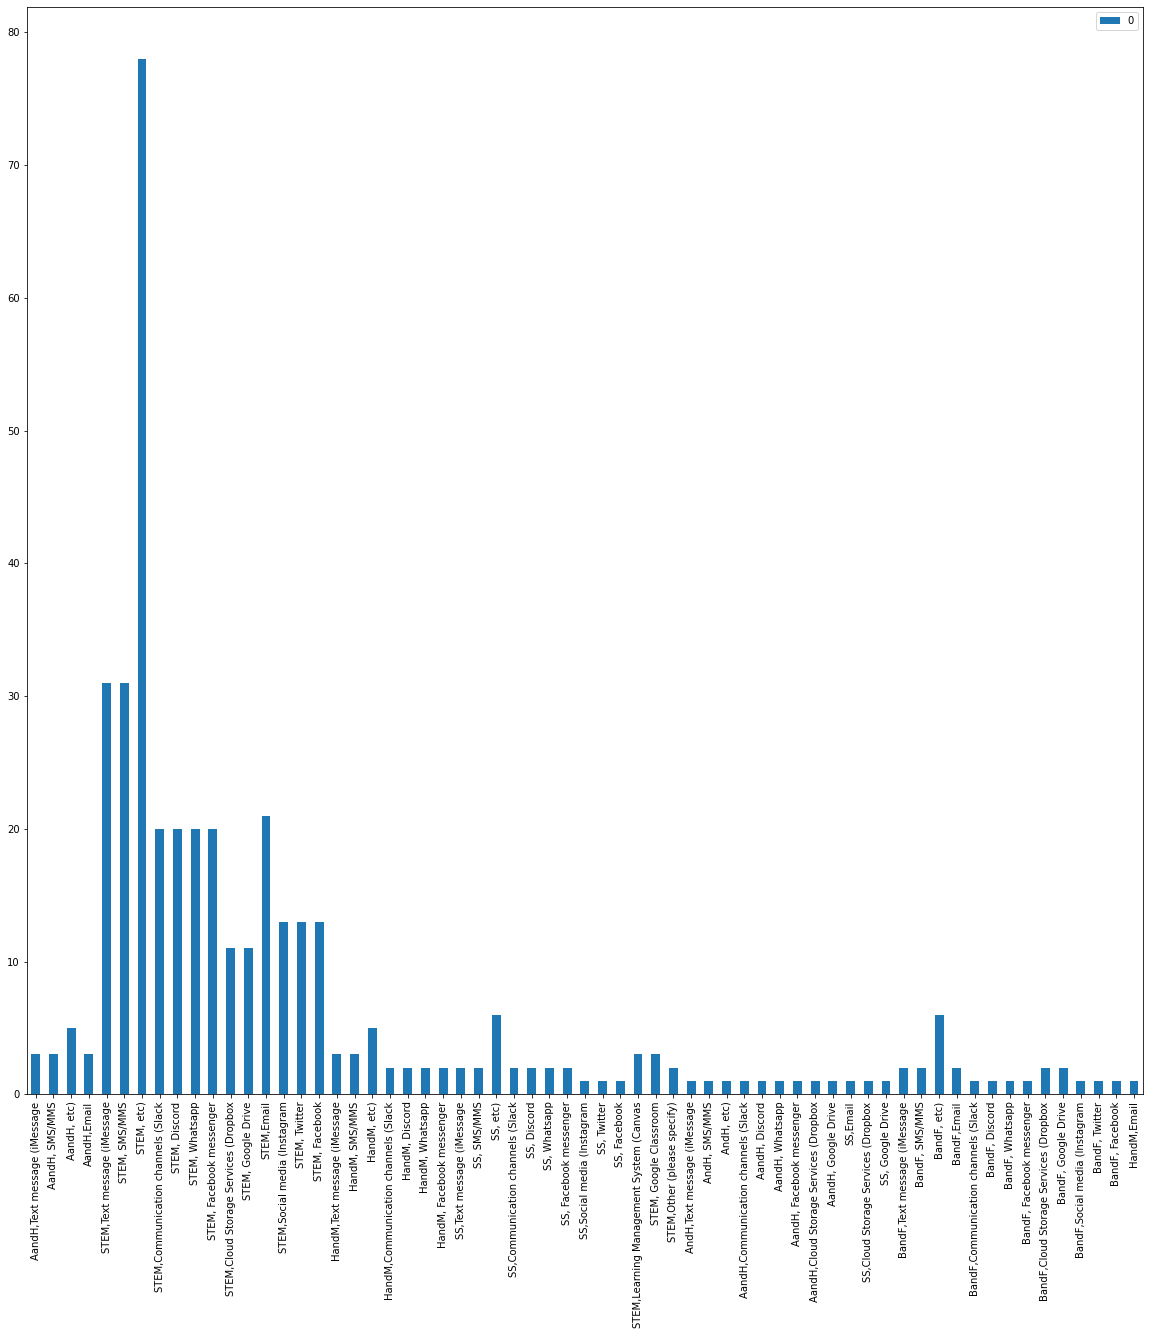

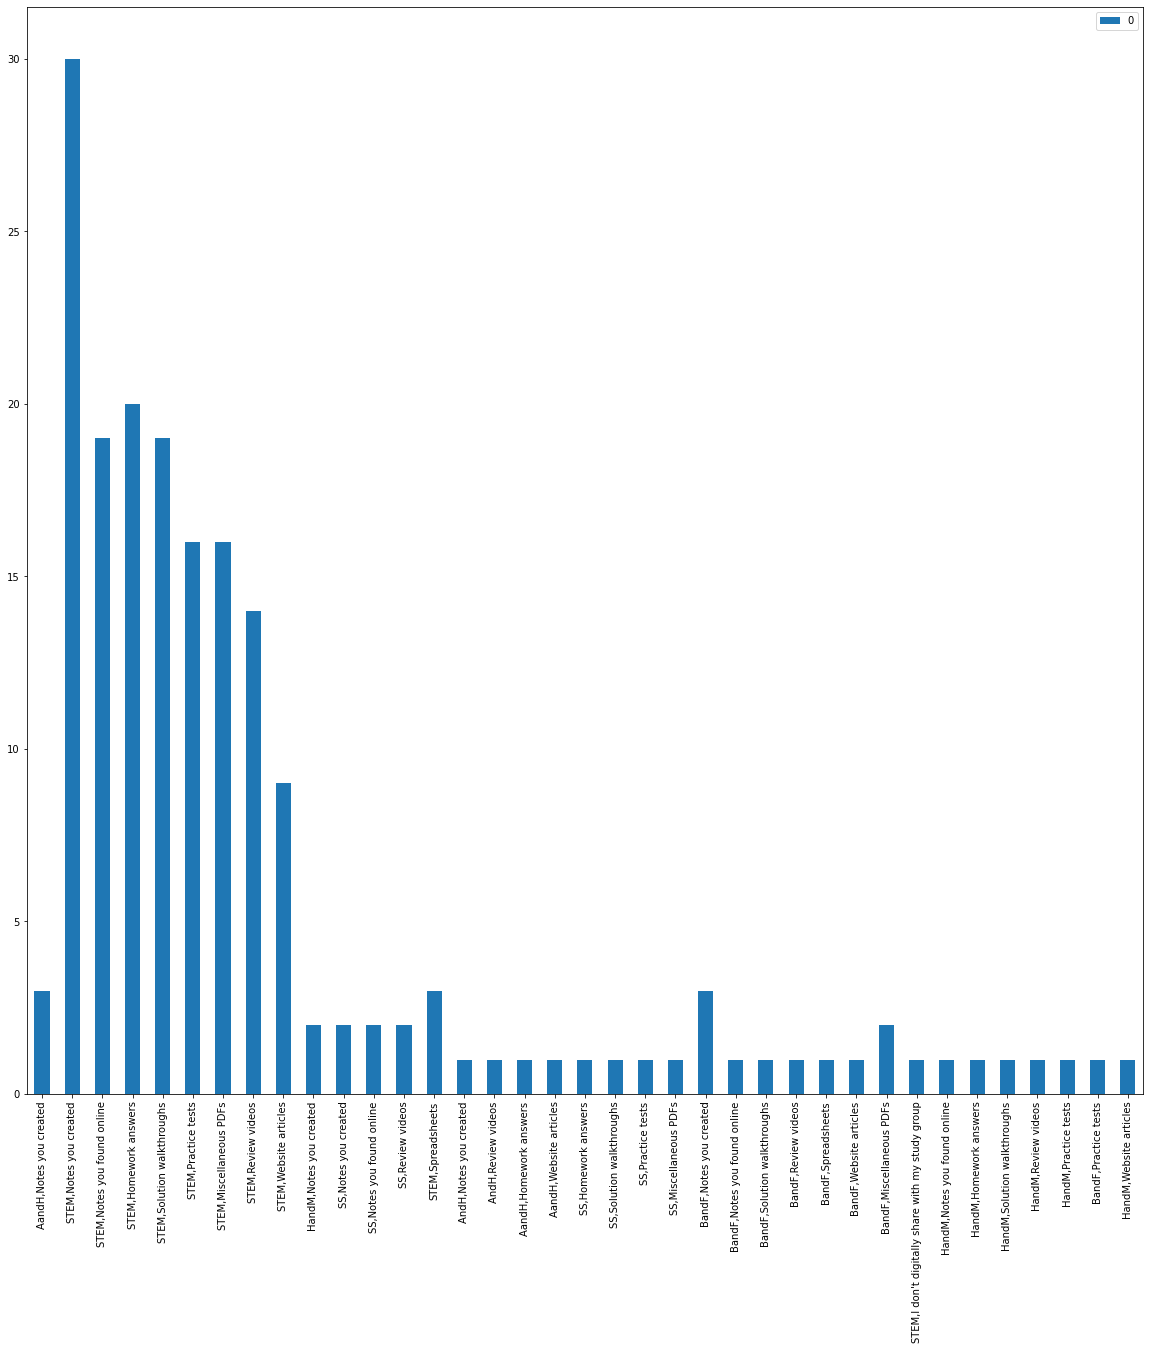

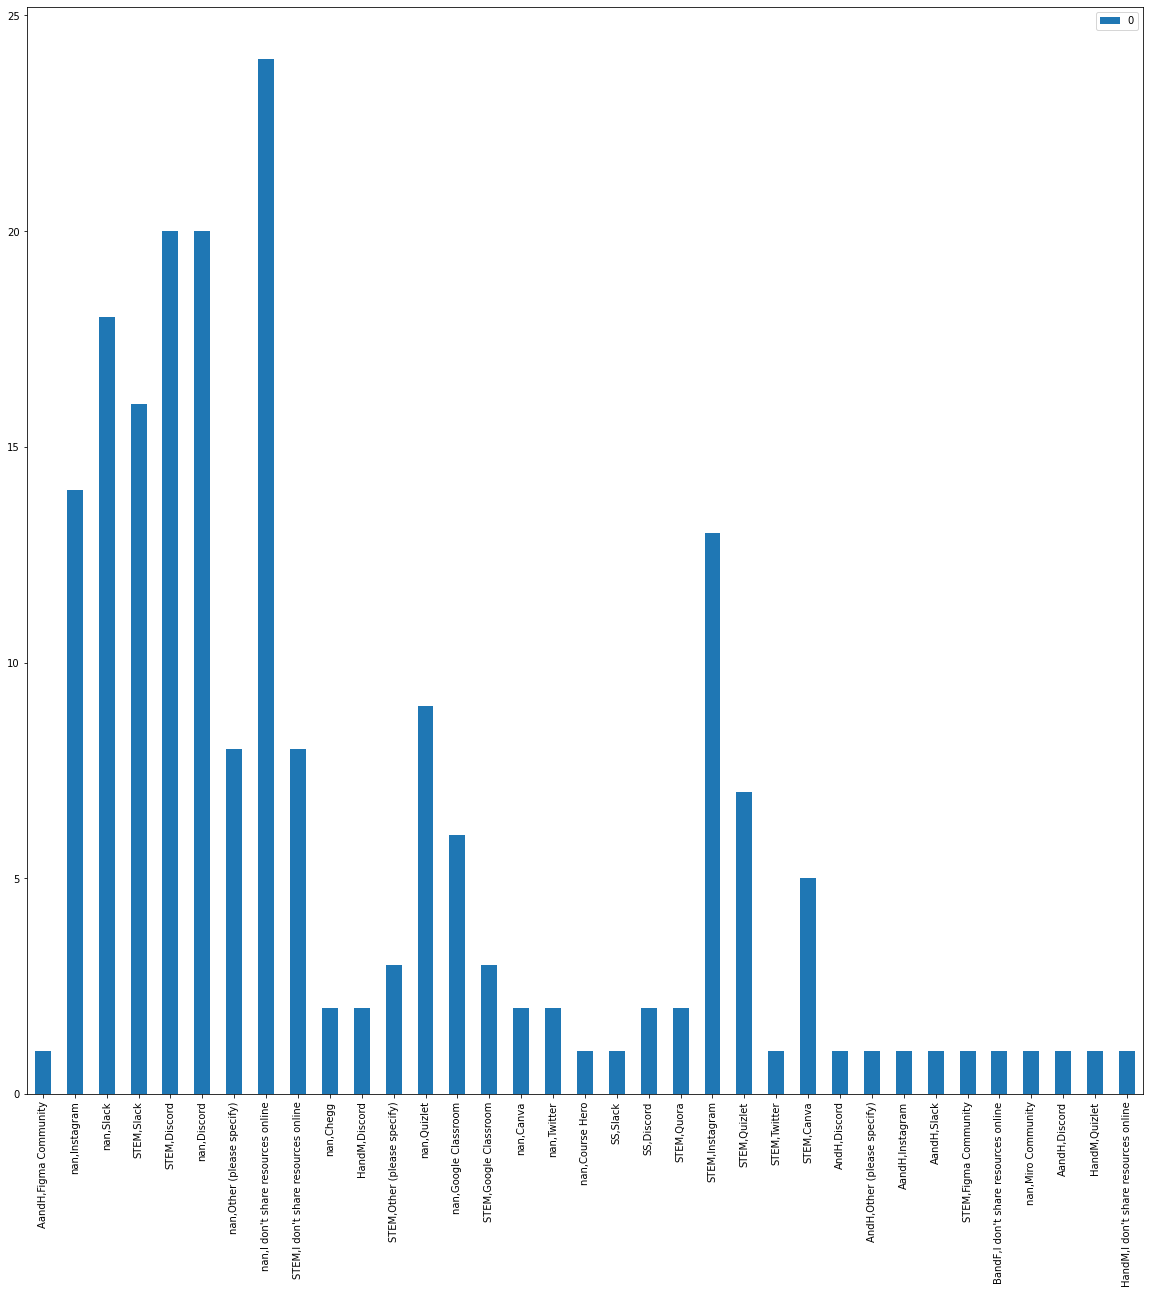

In [114]:
combs_Q10 = []
combs_Q11 = []
combs_Q13 = []

for rID in df.index:
    response = df.loc[rID]
    major_group = response['MAJOR_CATEGORY']
    study_group = response['STUDY_CATEGORY']
    
    if pd.notna(response['Q10']):
        for tool in response['Q10'].split(','):
            comb = str(study_group) + "," + str(tool)
            combs_Q10.append(comb)
    if pd.notna(response['Q11']):
        for tool in response['Q11'].split(','):
            comb = str(study_group) + "," + str(tool)
            combs_Q11.append(comb)
    if pd.notna(response['Q13']):
        for tool in response['Q13'].split(','):
            comb = str(study_group) + "," + str(tool)
            combs_Q13.append(comb)

Qs = [combs_Q10, combs_Q11, combs_Q13]
for q in Qs:
    count = Counter(q)
    temp_df = pd.DataFrame.from_dict(count, orient='index')
    temp_df.plot(kind='bar')